In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
# images separated by training and test within the data set - using separate folders

In [3]:
# building the network: convolution > pooling > flattening > full connection
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

1. Convolution - extract features from input image, preserving the spatial relationship between pixels
<br> First number (32): dimension of output space (32x32 matrix)
<br> Kernel_size: height and width of the 2D convolution window - can be a tuple if a rectangle is required
<br> Strides: specify strides, movement along the axis, tuple if we want different heights and widths

2. Pooling - pool_size - define the 'spatial neighbourhood' to take the max element from 
3. Flattening - convert matrix into one dimension 
4. Full connection - connecting convolutional network to NN for final prediction 

In [4]:
# Data Augmentation - altering current dataset (flips, translations, rotations) to reduce overfitting, and increases training data 
# can be done manually with PIL (pillow) or keras preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
# can lead to overfitting with many epochs, but too low will reduce the quality of the model
# TRAINING
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 20,
                         validation_data = test_set)

Epoch 1/20
 1/50 [..............................] - ETA: 3s - loss: 0.5278 - accuracy: 0.8125

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_34105/3158257038.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


50/50 [==============================] - 6s 113ms/step - loss: 0.6003 - accuracy: 0.6775 - val_loss: 0.6535 - val_accuracy: 0.6125
Epoch 2/20
50/50 [==============================] - 5s 101ms/step - loss: 0.6087 - accuracy: 0.6756 - val_loss: 0.5823 - val_accuracy: 0.7070
Epoch 3/20
50/50 [==============================] - 5s 99ms/step - loss: 0.5737 - accuracy: 0.7031 - val_loss: 0.5702 - val_accuracy: 0.7060
Epoch 4/20
50/50 [==============================] - 5s 99ms/step - loss: 0.5816 - accuracy: 0.6969 - val_loss: 0.5774 - val_accuracy: 0.7125
Epoch 5/20
50/50 [==============================] - 5s 98ms/step - loss: 0.5693 - accuracy: 0.7188 - val_loss: 0.5767 - val_accuracy: 0.7040
Epoch 6/20
50/50 [==============================] - 5s 97ms/step - loss: 0.5714 - accuracy: 0.7056 - val_loss: 0.5656 - val_accuracy: 0.7140
Epoch 7/20
50/50 [==============================] - 5s 97ms/step - loss: 0.5777 - accuracy: 0.7025 - val_loss: 0.5978 - val_accuracy: 0.6750
Epoch 8/20
50/50 [====

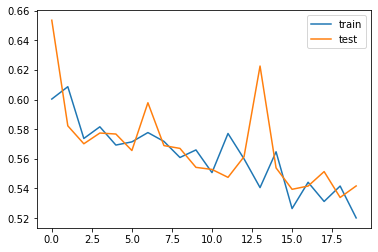

In [22]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('/Users/franzv/Downloads/cat.4002.jpg', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [ ]:
# network seems pretty bad at detecting cats